In [ ]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Engineering

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# check null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
## Seperating Feature and Target
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [12]:
## one hot encoded values for categorical columns
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [13]:
X = X.drop(['Geography','Gender'],axis=1)

In [14]:
X = pd.concat([X,geography,gender],axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Data Split and Scaling

In [16]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
## scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [46]:
classifier = Sequential()

In [47]:
# input layer
classifier.add(Dense(units=11,activation='relu'))

In [48]:
# 1st layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [49]:
# 2nd layer
classifier.add(Dense(units=5,activation='relu'))
classifier.add(Dropout(0.2))

In [50]:
# output layer
classifier.add(Dense(units=1,activation='sigmoid'))

**custom optimizer :**

    import tensorflow

    tensorflow.keras.optimizers import Adam

    opt = Adam(learning_rate=0.05)

    classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
# optimizer
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
# to induce early stopping
import tensorflow as tf
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [53]:
# model
model = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5434 - accuracy: 0.7774 - val_loss: 0.4821 - val_accuracy: 0.7989
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4917 - accuracy: 0.7998 - val_loss: 0.4478 - val_accuracy: 0.7989
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4682 - accuracy: 0.8003 - val_loss: 0.4323 - val_accuracy: 0.7989
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4483 - accuracy: 0.8005 - val_loss: 0.4127 - val_accuracy: 0.7989
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4387 - accuracy: 0.8005 - val_loss: 0.4048 - val_accuracy: 0.7989
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4262 - accuracy: 0.8009 - val_loss: 0.3860 - val_accuracy: 0.7989
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4148 - accuracy: 0.8231 - val_loss: 0.3785 - val_accuracy:

In [62]:
# validation parameters
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

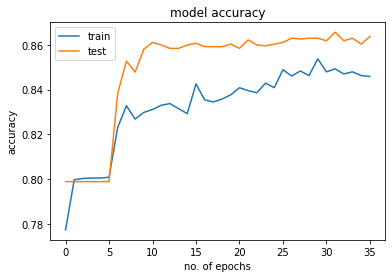

In [63]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

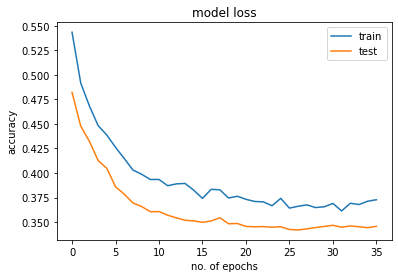

In [64]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [65]:
# model prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


## Validation

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [67]:
# confusion matrix
print("Confusion matrix :")
print(cm)

Confusion matrix :
[[1504   59]
 [ 238  199]]


In [68]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [69]:
print('Accuracy score :',score)

Accuracy score : 0.8515


## Save models

In [70]:
import pickle
# to save the scled model
scale = pickle.dump(scaler,open("scaling.pkl",'wb'))
# to save the ann model
model = pickle.dump(classifier,open("model.pkl","wb"))

# Load the model

In [72]:
# load the saved model
classifier = pickle.load(open('/content/model.pkl','rb'))